<a href="https://colab.research.google.com/github/Carranza16/Proyecto-Machine-Learning/blob/main/1_Intento_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Melbourne Dataset
Extraido desde: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

#Descripción de Variables:
**Rooms:** Número de habitaciones

**Price:** Precio en dolares

**Method:** S - propiedad vendida; SP - propiedad vendida ante; PI - propiedad traspasada; PN - vendido antes no divulgado; SN - vendido no divulgado; NB - sin oferta; VB - oferta del proveedor; W - retirado antes de la subasta; SA - vendido después de la subasta; SS - vendido después del precio de la subasta no revelado. N/A - precio u oferta más alta no disponible.

**Type:** br - bedroom(s); h - casa, cabaña, villa, semi, terraza; u - unidad, duplex; t - casa adosada; dev site - sitio en desarrollo; o res - otras residenciales.

**SellerG:** Agente de bienes raíces

**Date:** Fecha de venta

**Distance:** Distancia desde CBD

**Regionname:** Región General (West, North West, North, North east …etc)

**Propertycount:** Número de propiedades que existen en el suburbio.

**Bedroom2:** Numero de dormitorios (from different source)

**Bathroom:** Numero de baños

**Car:** Numero de sitios para aparcar

**Landsize:** Tamaño del terreno

**BuildingArea:** Tamaño del edificio

**CouncilArea:** Consejo de gobierno de la zona

# Problema: 
Predecir el precio de la vivienda en Melbourne en función a nuestras columnas X.

#Solución tecnológica: 

Utilizar un modelo de machine learning para analizar el conjunto de datos Melbourne Housing Snapshot y entrenar un modelo que pueda predecir el precio de la vivienda en función a todos los X. Se utilizará los modelos de RandomForest y AdaBoost. Luego, se podría evaluar el rendimiento del modelo utilizando las métricas nesarias.

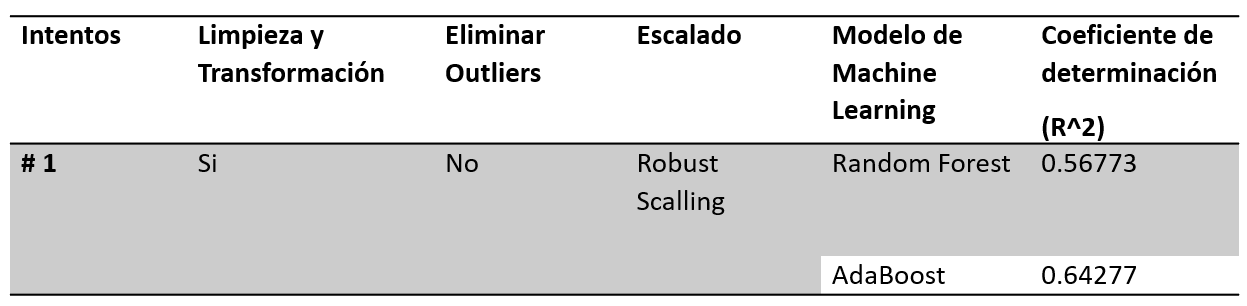

#Limpiar los datos: realiza el proceso EDA

In [ ]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt  
import seaborn as sns             
%matplotlib inline               

In [ ]:
# Leemos la data
melb_data = pd.read_csv("/content/sample_data/melb_data.csv")

In [ ]:
# Visualizamos la data
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# Visualizamos las columnas de la data
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# Observamos el tipo de dato de cada columna
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# Nulos en cada columna (variable)
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# Función para hallar el porcentaje de nulos en cada columna
def porcentaje(columna):
  total_null = columna.isnull().sum()
  return ((total_null)/len(columna))*100
porcentaje(melb_data) 

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [ ]:
# El porcentaje de datos en las variables es menor al 80% por lo tanto realizamos la 
# imputación para cada tipo de variable 

#Imputación de valores *nulos*

In [ ]:
# ['BuildingArea']
# Empezaremos con la columna BuildingArea
# 'BuildinArea' es el tamaño del edificio construido en metros
# Este dato está relacionado con nuestra columna 'Landsize' que es el tamaño
# del terreno en metros por lo tanto si el dato en 'Landsize' es 0 tambien lo
# debe ser en 'BuildingArea'. Ya que no puede haber un edificio construido donde
# no hay terreno. 

melb_data_relacion = melb_data[melb_data['Landsize'] == 0]
melb_data_relacion[['Landsize','BuildingArea','Price']]

,Landsize,BuildingArea,Price
8,0.0,NaN,300000.0
10,0.0,NaN,700000.0
12,0.0,94.00,750000.0
14,0.0,NaN,441000.0
21,0.0,NaN,900000.0
...,...,...,...
12168,0.0,82.00,600000.0
12176,0.0,NaN,1050000.0
12188,0.0,66.32,300000.0
12207,0.0,35.64,385000.0


In [ ]:
# Llenamos los valores faltantes con 0 gracias a la función fillna()
melb_data_ba = melb_data
melb_data_ba['BuildingArea'] = melb_data_ba['BuildingArea'].fillna(0) 
melb_data_ba['BuildingArea'][8:22]

8       0.0
9      75.0
10      0.0
11    190.0
12     94.0
13      0.0
14      0.0
15     97.0
16    110.0
17    105.0
18      0.0
19     73.0
20    135.0
21      0.0
Name: BuildingArea, dtype: float64

In [ ]:
# ['Car']
# Nuestra columna 'Car' hace referencia a la cantidad de coches que se pueden
# aparcar en el terreno, por lo tanto hemos relacionado la columna 'Car' con la
# 'Suburb' que es la calle.
# Imputaremos la mediana de 'Car' segun la calle 'Suburb' a la que pertenece
# .
# .
# Agruparemos los datos por Suburbio 
# Creamos un diccionaro de numero de aparcamientos segun el suburbio

use_cols = ['Suburb','Car']
imp_car = pd.read_csv('/content/sample_data/melb_data.csv',usecols=use_cols)

df_suburb_car = imp_car.groupby(['Suburb']).agg('median')
df_suburb_car['Car_round'] = round(df_suburb_car['Car'])
df_suburb_car.drop(['Car'],axis=1, inplace= True)
df_suburb_car =df_suburb_car.rename(columns={'Car_round':'Car'})

list_suburb_car = df_suburb_car.reset_index()
dict_suburb_car = dict(zip(list_suburb_car.Suburb, list_suburb_car.Car))
#dict_suburb_car

In [ ]:
# Llenamos los datos nulos con el diccionario que creamos
melb_data_ba.Car = melb_data_ba.Car.fillna(melb_data_ba.Suburb.map(dict_suburb_car))
melb_data_ba['Car'].isnull().sum()

0

In [ ]:
# Para la variable 'YearBuild' que es el año de construcción
# Realizamos la imputación con el valor 0 debido a que los datos nulos
# coinciden con el tamaño del edificio que realmente no existe
# por ende no existe o no hay un año de construcción

melb_data_yb = melb_data_ba
melb_data_yb['YearBuilt'] = melb_data_yb['YearBuilt'].fillna(melb_data_yb['YearBuilt'].mode()[0])

In [ ]:
# ['YearBuilt']
# Para la variable 'YearBuild' que es el año de construcción
# Realizamos la imputación con el valor 0 debido a que los datos nulos
# coinciden con el tamaño del edificio que realmente no existe
# por ende no existe o no hay un año de construcción

melb_data_year_ba = melb_data_ba[melb_data['BuildingArea'] == 0]
melb_data_year_ba[['BuildingArea','YearBuilt','Price']]

,BuildingArea,YearBuilt,Price
0,0.0,1970.0,1480000.0
3,0.0,1970.0,850000.0
5,0.0,1970.0,941000.0
8,0.0,1970.0,300000.0
10,0.0,1970.0,700000.0
...,...,...,...
13569,0.0,1970.0,1323000.0
13570,0.0,1970.0,970000.0
13574,0.0,1970.0,582000.0
13575,0.0,1981.0,1245000.0


In [ ]:
# Llenamos los valores faltantes con 0 gracias a la función fillna()
melb_data_yb = melb_data_ba
melb_data_yb['YearBuilt'] = melb_data_yb['YearBuilt'].fillna(0) 
melb_data_yb['YearBuilt'][0:10]

0    1970.0
1    1900.0
2    1900.0
3    1970.0
4    2014.0
5    1970.0
6    1910.0
7    1890.0
8    1970.0
9    1900.0
Name: YearBuilt, dtype: float64

In [ ]:
# ['CoouncilArea']
# Para la variable 'CouncilArea' (Gobierno del Area) que está relacionada con el 
# suburbio y la región. Para este caso hemos escogido la columna 'Regionname'
# para agrupar los gobiernos más comunes por región.
#
melb_data_yb[['Suburb','CouncilArea','Regionname']][13565:13579]

,Suburb,CouncilArea,Regionname
13565,Vermont,NaN,Eastern Metropolitan
13566,Vermont South,NaN,Eastern Metropolitan
13567,Viewbank,NaN,Eastern Metropolitan
13568,Wantirna,NaN,Eastern Metropolitan
13569,Wantirna South,NaN,Eastern Metropolitan
13570,Wantirna South,NaN,Eastern Metropolitan
13571,Wantirna South,NaN,Eastern Metropolitan
13572,Watsonia,NaN,Northern Metropolitan
13573,Werribee,NaN,Western Metropolitan
13574,Westmeadows,NaN,Northern Metropolitan


In [ ]:
# Empezamos creando un dataframe nuevo para crear un diccionario
#
use_cols = ['Regionname', 'CouncilArea', 'Address']
council = pd.read_csv('/content/sample_data/melb_data.csv',usecols=use_cols)

council['CouncilArea'].isnull().sum(), council['CouncilArea'].unique().size

(1369, 34)

In [ ]:
# Agrupamos los datos por la columna 'RegionName' y seccionamos los CouncilArea
# mas frecuentes por recgión
#
df_council = council.groupby(['Regionname','CouncilArea'])['Address'].count()
df_council_01 = df_council.reset_index()
df_council_02 = df_council_01.sort_values(['Regionname','Address'],ascending=False)

df_council_03 = df_council_02.drop_duplicates(subset = "CouncilArea")
df_council_03 = df_council_03.sort_values(['Address'],ascending=False)
df_council_03['CouncilArea'].unique().size

33

In [ ]:
# Creamos el diccionario
df_council_03.drop(['Address'],axis=1, inplace= True)

dict_council = dict(zip(df_council_03.Regionname, df_council_03.CouncilArea))
dict_council

{'Southern Metropolitan': 'Unavailable',
 'Western Metropolitan': 'Moreland',
 'Northern Metropolitan': 'Banyule',
 'Eastern Metropolitan': 'Maroondah',
 'South-Eastern Metropolitan': 'Knox',
 'Western Victoria': 'Moorabool',
 'Eastern Victoria': 'Manningham',
 'Northern Victoria': 'Yarra Ranges'}

In [ ]:
# Con el diccionario creado mapeamos y llenamos los valores nulos.
melb_data_co = melb_data_yb.copy()
melb_data_co.CouncilArea = melb_data_co.CouncilArea.fillna(melb_data_co.Regionname.map(dict_council))
melb_data_co['CouncilArea'].isnull().sum()


0

Text(0, 0.5, 'Number of houses')

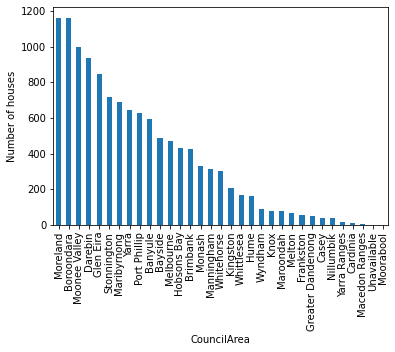

In [ ]:
# Mostramos la diferencia entre la data original con la data imputada para
# CouncilArea
# Data original:
#
melb_data_yb['CouncilArea'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('CouncilArea')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

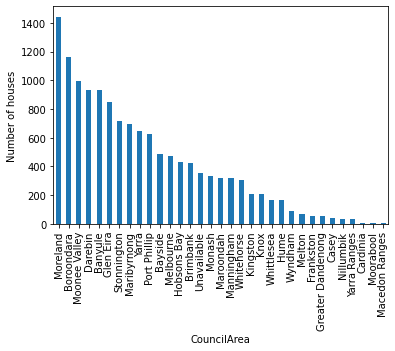

In [ ]:
# Data imputada:
#
melb_data_co['CouncilArea'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('CouncilArea')
plt.ylabel('Number of houses')

In [ ]:
# Se muestra las columnas sin nulos
melb_data_co.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Eliminamos las columnas que no aportarán al modelo

In [ ]:
# Elimanos las columnas: SellerG, Postcode, Lattitude, Longtitude
melb_data_co.drop(['SellerG'],axis='columns', inplace= True)
melb_data_co.drop(['Postcode'],axis='columns', inplace= True)
melb_data_co.drop(['Lattitude'],axis='columns', inplace= True)
melb_data_co.drop(['Longtitude'],axis='columns', inplace= True)
melb_data_co.drop(['Address'],axis='columns', inplace= True)

In [ ]:
# La variable 'Date' la convertimos a variable de tipo Fecha
melb_data_co['Date'] = pd.to_datetime(melb_data_co['Date'], infer_datetime_format=True)

# Eliminamos Date y convertimos en un sola columna Year
melb_data_co['year'] = melb_data_co['Date'].dt.year
melb_data_co.drop(['Date'],axis=1, inplace= True)
melb_data_co.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,year
0,Abbotsford,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,0.0,1970.0,Yarra,Northern Metropolitan,4019.0,2016
1,Abbotsford,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,2016
2,Abbotsford,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,2017
3,Abbotsford,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,0.0,1970.0,Yarra,Northern Metropolitan,4019.0,2017
4,Abbotsford,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,2016


In [ ]:
melb_data_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  object 
 5   Distance       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13580 non-null  float64
 9   Landsize       13580 non-null  float64
 10  BuildingArea   13580 non-null  float64
 11  YearBuilt      13580 non-null  float64
 12  CouncilArea    13580 non-null  object 
 13  Regionname     13580 non-null  object 
 14  Propertycount  13580 non-null  float64
 15  year           13580 non-null  int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 1.7+ MB


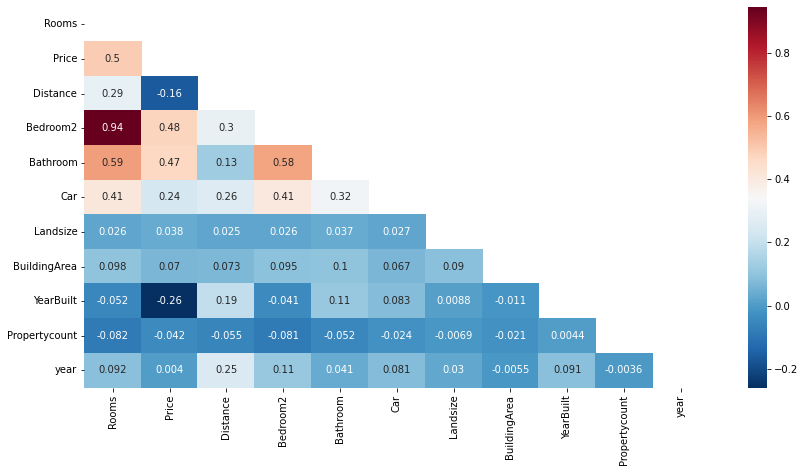

In [ ]:
# Mostramos la correlación de las variables
plt.figure(figsize=(14,7))
MatrizInf = np.triu(melb_data_co.corr())
sns.heatmap(melb_data_co.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

# Transformación de datos categóricos

## *ONE HOT ENCODING para las columnas 'Regionname', 'Type', 'Method' y 'CouncilArea'*

In [ ]:
# Tambien con sklearn
# ONE HOT ENCODIGN to Regionname
#
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder(handle_unknown='ignore',sparse=False)

oe_results_reg = oe_style.fit_transform(melb_data_co[['Regionname']])
oe_style.get_feature_names_out()
oe_reg = pd.DataFrame(oe_results_reg, columns=oe_style.categories_[0])

In [ ]:
# ONE HOT ENCODIGN to Type
#
oe_results_type = oe_style.fit_transform(melb_data_co[['Type']])
oe_style.get_feature_names_out()
oe_type = pd.DataFrame(oe_results_type, columns=oe_style.categories_[0])

In [ ]:
# ONE HOT ENCODIGN to Method
#
oe_results_method = oe_style.fit_transform(melb_data_co[['Method']])
oe_style.get_feature_names_out()
oe_method = pd.DataFrame(oe_results_method, columns=oe_style.categories_[0])

In [ ]:
# ONE HOT ENCODIGN to CouncilArea
#
oe_results_coun = oe_style.fit_transform(melb_data_co[['CouncilArea']])
oe_style.get_feature_names_out()
oe_coun = pd.DataFrame(oe_results_coun, columns=oe_style.categories_[0])

In [ ]:
# concatenar los dataframes con los dummys al dataframe original
oe_melb_data = pd.concat([melb_data_co,oe_reg,oe_type,oe_method,oe_coun], axis = 1)
oe_melb_data.drop(['Regionname'],axis=1, inplace= True)
oe_melb_data.drop(['Type'],axis=1, inplace= True)
oe_melb_data.drop(['Method'],axis=1, inplace= True)
oe_melb_data.drop(['CouncilArea'],axis=1, inplace= True)
oe_melb_data.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'year',
       'Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria',
       'h', 't', 'u', 'PI', 'S', 'SA', 'SP', 'VB', 'Banyule', 'Bayside',
       'Boroondara', 'Brimbank', 'Cardinia', 'Casey', 'Darebin', 'Frankston',
       'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume', 'Kingston',
       'Knox', 'Macedon Ranges', 'Manningham', 'Maribyrnong', 'Maroondah',
       'Melbourne', 'Melton', 'Monash', 'Moonee Valley', 'Moorabool',
       'Moreland', 'Nillumbik', 'Port Phillip', 'Stonnington', 'Unavailable',
       'Whitehorse', 'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'],
      dtype='object')

In [ ]:
oe_melb_data.head()

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,Abbotsford,2,1480000.0,2.5,2.0,1.0,1.0,202.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Abbotsford,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Abbotsford,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Abbotsford,3,850000.0,2.5,3.0,2.0,1.0,94.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Abbotsford,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## *LABEL ENCODER para la columna 'Suburb'*

In [ ]:
# LabelEncoder ['Suburb']
#
oe_melb_data.groupby(['Suburb'])['Price'].mean().sort_values()

Suburb
Bacchus Marsh    2.850000e+05
Rockbank         3.400000e+05
Kurunjang        3.530000e+05
Wallan           3.660000e+05
Melton South     3.807361e+05
                     ...     
Brighton         1.930158e+06
Albert Park      1.941355e+06
Middle Park      2.082529e+06
Canterbury       2.180241e+06
Kooyong          2.185000e+06
Name: Price, Length: 314, dtype: float64

In [ ]:
ordered_labels = oe_melb_data.groupby(['Suburb'
                                  ])['Price'].mean().sort_values().index

ordered_labels

Index(['Bacchus Marsh', 'Rockbank', 'Kurunjang', 'Wallan', 'Melton South',
       'Dallas', 'Melton', 'Melton West', 'Brookfield', 'Truganina',
       ...
       'Kew', 'Malvern', 'Balwyn North', 'Eaglemont', 'Balwyn', 'Brighton',
       'Albert Park', 'Middle Park', 'Canterbury', 'Kooyong'],
      dtype='object', name='Suburb', length=314)

In [36]:
# a continuación, creemos un diccionario con las asignaciones de categorías a números
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'Bacchus Marsh': 0,
 'Rockbank': 1,
 'Kurunjang': 2,
 'Wallan': 3,
 'Melton South': 4,
 'Dallas': 5,
 'Melton': 6,
 'Melton West': 7,
 'Brookfield': 8,
 'Truganina': 9,
 'Coolaroo': 10,
 'Campbellfield': 11,
 'Wyndham Vale': 12,
 'Roxburgh Park': 13,
 'Tarneit': 14,
 'Meadow Heights': 15,
 'Doreen': 16,
 'Pakenham': 17,
 'Doveton': 18,
 'Wollert': 19,
 'Werribee': 20,
 'Diggers Rest': 21,
 'Jacana': 22,
 'Sunbury': 23,
 'Frankston North': 24,
 'Williams Landing': 25,
 'Bullengarook': 26,
 'Albanvale': 27,
 'Kings Park': 28,
 'Delahey': 29,
 'Carrum Downs': 30,
 'Hampton Park': 31,
 'Craigieburn': 32,
 'Officer': 33,
 'Hoppers Crossing': 34,
 'Mount Evelyn': 35,
 'Epping': 36,
 'Upwey': 37,
 'Seabrook': 38,
 'Kealba': 39,
 'The Basin': 40,
 'Cranbourne North': 41,
 'Albion': 42,
 'Sunshine West': 43,
 'Burnside Heights': 44,
 'Skye': 45,
 'Whittlesea': 46,
 'Mernda': 47,
 'Beaconsfield': 48,
 'St Albans': 49,
 'Deer Park': 50,
 'Taylors Hill': 51,
 'Tullamarine': 52,
 'Broadmeadows': 5

In [37]:
# ahora, reemplazamos las etiquetas con los números enteros
oe_melb_data['Suburb'] = oe_melb_data['Suburb'].map(ordinal_mapping)

In [38]:
# exploramos los resultados
oe_melb_data.head(10)

,Suburb,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Moreland,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges
0,216,2,1480000.0,2.5,2.0,1.0,1.0,202.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,216,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,216,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,216,3,850000.0,2.5,3.0,2.0,1.0,94.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,216,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,216,2,941000.0,2.5,2.0,1.0,0.0,181.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,216,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,216,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,216,1,300000.0,2.5,1.0,1.0,1.0,0.0,0.0,1970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,216,2,1097000.0,2.5,3.0,1.0,2.0,220.0,75.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


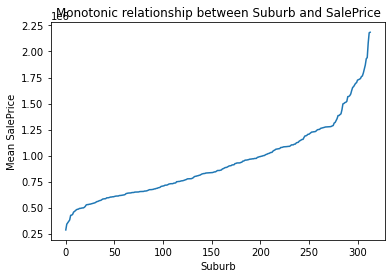

In [39]:
for var in ['Suburb']:
    
    fig = plt.figure()
    fig = oe_melb_data.groupby([var])['Price'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()


In [40]:
# Visualizamos las columnas del nuevo dataset
oe_melb_data.columns

Index(['Suburb', 'Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'year',
       'Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria',
       'h', 't', 'u', 'PI', 'S', 'SA', 'SP', 'VB', 'Banyule', 'Bayside',
       'Boroondara', 'Brimbank', 'Cardinia', 'Casey', 'Darebin', 'Frankston',
       'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume', 'Kingston',
       'Knox', 'Macedon Ranges', 'Manningham', 'Maribyrnong', 'Maroondah',
       'Melbourne', 'Melton', 'Monash', 'Moonee Valley', 'Moorabool',
       'Moreland', 'Nillumbik', 'Port Phillip', 'Stonnington', 'Unavailable',
       'Whitehorse', 'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'],
      dtype='object')

# RobustScaling

Este método de escalado robusto produce estimaciones más sólidas para el centro y el rango de la variable, y se recomienda si los datos muestran valores atípicos.

En pocas palabras, RobustScaling:

*   centra la mediana en 0
*   la varianza varía según las variables puede no conservar la forma de la distribución original
*   los valores mínimo y máximo varían.
*   valores atípicos robustos

In [41]:
import seaborn as sns
# para Q-Q plots
import scipy.stats as stats

In [42]:
# función para crear histograma, gráfico Q-Q y
# diagrama de caja.

def diagnostic_plots(df, variable):
    # La función toma un marco de datos (df) y
    # la variable de interés como argumentos

    # define el tamaño de la figura
    plt.figure(figsize=(16, 4))

    # histograma
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

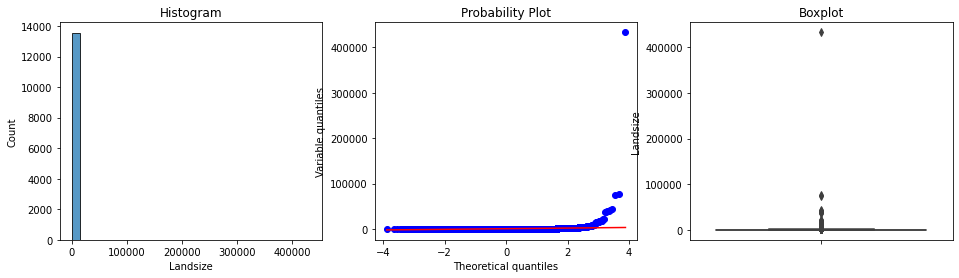

In [43]:
# encontremos valores atípicos en Landsize
diagnostic_plots(oe_melb_data, 'Landsize')

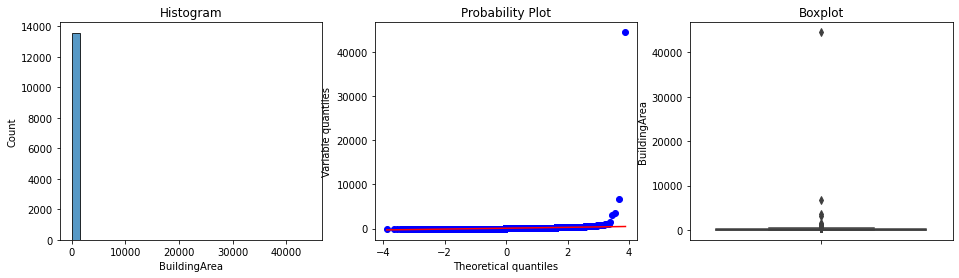

In [44]:
# encontremos valores atípicos en BuildingArea
diagnostic_plots(oe_melb_data, 'BuildingArea')

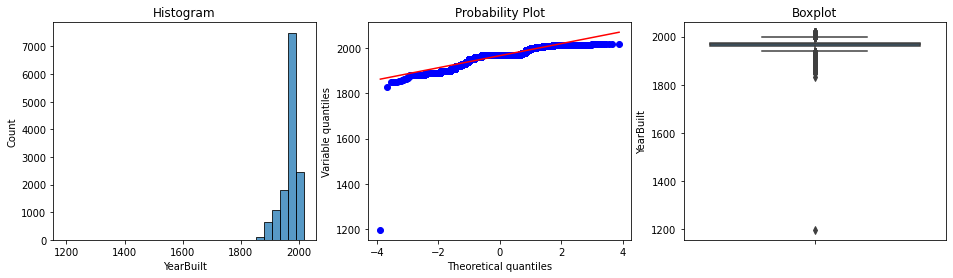

In [45]:
# encontremos valores atípicos en YearBuilt
diagnostic_plots(oe_melb_data, 'YearBuilt')

MaxAbsScaler de scikit-learn vuelve a escalar las funciones a su valor máximo, de modo que el nuevo valor máximo sea 1.

In [46]:
from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

In [47]:
# separemos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(oe_melb_data.drop('Price', axis=1),
                                                    oe_melb_data['Price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((9506, 60), (4074, 60))

In [48]:
# configurar el escalador
scaler = RobustScaler()

# ajuste el escalador al juego de trenes, aprenderá los parámetros
scaler.fit(X_train)

# transformar a train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# el escalador almacena los valores medianos de las características aprendidas 
# del conjunto de trenes
scaler.center_

array([2.070e+02, 3.000e+00, 9.200e+00, 3.000e+00, 1.000e+00, 2.000e+00,
       4.410e+02, 5.000e+01, 1.970e+03, 6.567e+03, 2.017e+03, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [50]:
# el escalador almacena los valores IQR de las características aprendidas del c
# conjunto de datos
scaler.scale_

array([1.2700e+02, 2.0000e+00, 6.9000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 4.7375e+02, 1.2900e+02, 1.5000e+01, 5.9510e+03,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

In [51]:
# transformemos las matrices NumPy devueltas en dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [52]:
# echemos un vistazo al conjunto de datos de entrenamiento original: valores medios
# Uso np.round para reducir el número de decimales a 1.
np.round(X_train.median(), 1)

Suburb                         207.0
Rooms                            3.0
Distance                         9.2
Bedroom2                         3.0
Bathroom                         1.0
Car                              2.0
Landsize                       441.0
BuildingArea                    50.0
YearBuilt                     1970.0
Propertycount                 6567.0
year                          2017.0
Eastern Metropolitan             0.0
Eastern Victoria                 0.0
Northern Metropolitan            0.0
Northern Victoria                0.0
South-Eastern Metropolitan       0.0
Southern Metropolitan            0.0
Western Metropolitan             0.0
Western Victoria                 0.0
h                                1.0
t                                0.0
u                                0.0
PI                               0.0
S                                1.0
SA                               0.0
SP                               0.0
VB                               0.0
B

In [53]:
# echemos un vistazo al conjunto de datos de entrenamiento escalado: valores medios
# Uso np.round para reducir el número de decimales a 1.
np.round(X_train_scaled.median(), 1)

Suburb                        0.0
Rooms                         0.0
Distance                      0.0
Bedroom2                      0.0
Bathroom                      0.0
Car                           0.0
Landsize                      0.0
BuildingArea                  0.0
YearBuilt                     0.0
Propertycount                 0.0
year                          0.0
Eastern Metropolitan          0.0
Eastern Victoria              0.0
Northern Metropolitan         0.0
Northern Victoria             0.0
South-Eastern Metropolitan    0.0
Southern Metropolitan         0.0
Western Metropolitan          0.0
Western Victoria              0.0
h                             0.0
t                             0.0
u                             0.0
PI                            0.0
S                             0.0
SA                            0.0
SP                            0.0
VB                            0.0
Banyule                       0.0
Bayside                       0.0
Boroondara    

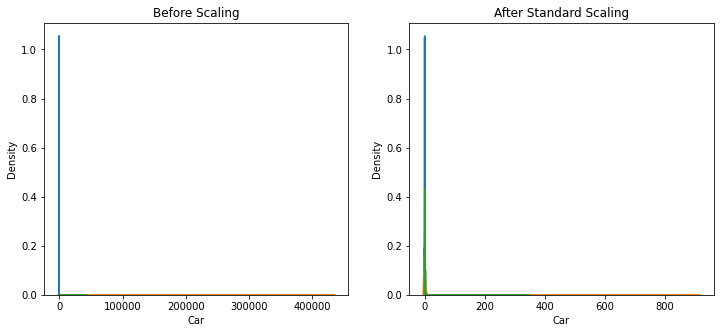

In [54]:
# comparemos las distribuciones de variables antes y después de escalar
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes del escalado
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Car'], ax=ax1)
sns.kdeplot(X_train['Landsize'], ax=ax1)
sns.kdeplot(X_train['BuildingArea'], ax=ax1)

# despues del escalado
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Car'], ax=ax2)
sns.kdeplot(X_train_scaled['Landsize'], ax=ax2)
sns.kdeplot(X_train_scaled['BuildingArea'], ax=ax2)
plt.show()

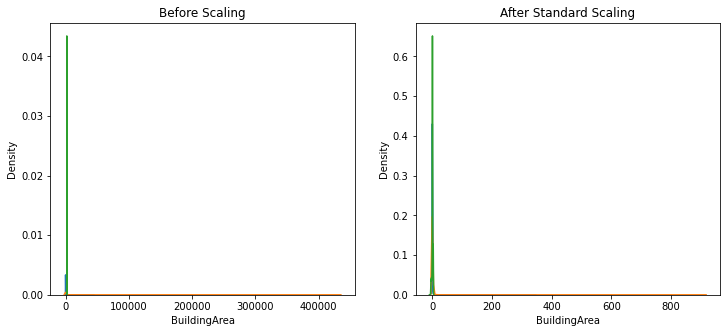

In [55]:
# comparemos las distribuciones de variables antes y después de escalar

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes del escalado
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BuildingArea'], ax=ax1)
sns.kdeplot(X_train['Landsize'], ax=ax1)
sns.kdeplot(X_train['YearBuilt'], ax=ax1)

# despues del escalado
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['BuildingArea'], ax=ax2)
sns.kdeplot(X_train_scaled['Landsize'], ax=ax2)
sns.kdeplot(X_train_scaled['YearBuilt'], ax=ax2)
plt.show()  

# Modelos de Machine Learning

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [57]:
# predicción en conjunto de prueba
y_predict = rf.predict(X_test_scaled)

In [60]:
# Importar scikit-learn módulo de métricas para el cálculo de precisión
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Error Cuadratico Medio =',mean_squared_error(y_test, y_predict))
print('R^2 =',metrics.explained_variance_score(y_test,y_predict))

Error Cuadratico Medio = 180588095929.87335
R^2 = 0.5677363624807051


## AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

adb = AdaBoostRegressor(random_state=42, n_estimators=100)
adb.fit(X_train_scaled, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [62]:
# predicción en conjunto de prueba
y_predict = adb.predict(X_test_scaled)

In [63]:
# Importar scikit-learn módulo de métricas para el cálculo de precisión
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Error Cuadratico Medio =',mean_squared_error(y_test, y_predict))
print('R^2 =',metrics.explained_variance_score(y_test,y_predict))

Error Cuadratico Medio = 375018219304.4979
R^2 = 0.642771485566539
